# Basic Convolutional Neural Networks (CNN)
- Objective: create basic CNN models with Keras

<img src="https://adeshpande3.github.io/assets/Cover.png" style="width: 800px"/>

<br>

- Fundamental CNN structures: CNNs are similar to Multilayer Perceptrons (MLPs) since they only feed signals forward (feedforward nets), but have different kind of layers unique to CNNs  
  - ** Convolutional layer** : process data in a small receptive field (i.e., filter)  
  - ** Pooling layer** : downsample along 2 dimensions (usually width and height)   
  - ** Dense (fully connected) layer** : similar to hidden layers of MLPs  

<img src="http://cs231n.github.io/assets/cnn/convnet.jpeg" style="width: 600px"/>
<br>
<center> **ConvNet architecture** </center>

In [1]:
!nvidia-smi
!uptime
!nproc

Mon Mar  9 13:21:52 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.33.01    Driver Version: 440.33.01    CUDA Version: 10.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:86:00.0 Off |                    0 |
| N/A   27C    P0    53W / 300W |      0MiB / 16160MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

/packages/7x/anaconda3/5.3.0/envs/tf1.13-gpu/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/packages/7x/anaconda3/5.3.0/envs/tf1.13-gpu/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/packages/7x/anaconda3/5.3.0/envs/tf1.13-gpu/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/packages/7x/ana

### Load Datset
- Digits dataset in sklearn
- Doc: http://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html

In [4]:
data = datasets.load_digits()

In [5]:
K,M,N = data.images.shape
FI = data.images[:10].reshape((10*M,N))
K

1797

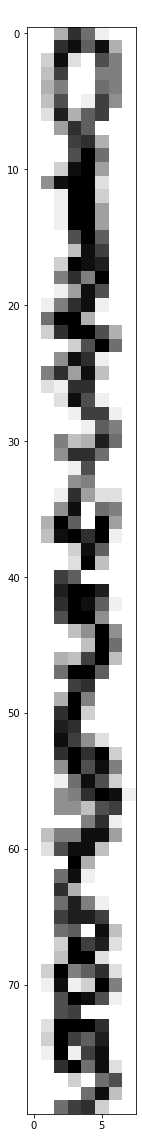

In [6]:
k=0
plt.close()
plt.figure(figsize=(20,20))
plt.imshow(FI,cmap=plt.cm.binary)    # show first number in the dataset
plt.title('label: %d' % data.target[k],fontsize=18,color='w')    # label = '0'
plt.show()

In [7]:
X_data = data.images
y_data = data.target

In [8]:
# shape of data
print(X_data.shape)    # (8 X 8) format
print(y_data.shape)

(1797, 8, 8)
(1797,)


In [9]:
# reshape X_data into 3-D format
# note that this follows image format of Tensorflow backend
X_data = X_data.reshape((X_data.shape[0], X_data.shape[1], X_data.shape[2], 1))

In [10]:
# one-hot encoding of y_data
y_data = to_categorical(y_data)

In [11]:
print(y_data[0])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [12]:
# partition data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.3, random_state = 777)

In [13]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1257, 8, 8, 1)
(540, 8, 8, 1)
(1257, 10)
(540, 10)


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D

### 1. Creating model
- Creating a model is same with MLP (Sequential)

In [15]:
model = Sequential()

### 2. Convolutional Layer
- In general, 2D convolutional layer is used for image processing
    - Size of filter (designated by 'kernel_size' parameter) defines **width and height of receptive field **
    - Number of filters (designated by 'filters' parameter) is equal to **depth of the next layer**
    - Strides (designated by 'strides' parameter) is** how far a filter makes change in its position** for each move
    - Image can be **zero-padded** in order to prevent getting too small (designated by 'padding' parameter)
- Doc: https://keras.io/layers/convolutional/
<img src="http://cs231n.github.io/assets/cnn/depthcol.jpeg" style="width: 400px"/>

In [16]:
# convolution layer
model.add(Conv2D(input_shape = (X_data.shape[1], X_data.shape[2], X_data.shape[3]), filters = 10, kernel_size = (3,3), strides = (1,1), padding = 'valid'))

Instructions for updating:
Colocations handled automatically by placer.


### 3. Activation Layer
- Identical to the activation layers in MLP
- In general, relu is used as well
- Doc: http://cs231n.github.io/assets/cnn/depthcol.jpeg

In [17]:
model.add(Activation('relu'))

### 4. Pooling layer
- In general, max pooling method is used
- Reduces number of parameters
- Doc: https://keras.io/layers/pooling/
<img src="http://cs231n.github.io/assets/cnn/maxpool.jpeg" style="width: 600px"/>

In [18]:
model.add(MaxPooling2D(pool_size = (2,2)))

### 5. Dense (fully connected layer)
- Convolutional & pooling layers can be connected to dense layers
- Sometimes, dense layers can be omitted
- Doc: https://keras.io/layers/core/

In [19]:
# prior layer should be flattend to be connected to dense layers
model.add(Flatten())

In [20]:
# dense layer with 50 neurons
model.add(Dense(50, activation = 'relu'))

In [21]:
# final layer with 10 neurons to classify the instances
model.add(Dense(10, activation = 'softmax'))

### 6. Model compile & train
- Optimize with adaptive moment estimation (Adam)
- accuracy as the metric

In [22]:
adam = optimizers.Adam(lr = 0.001)
model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

In [23]:
history = model.fit(X_train, y_train, batch_size = 50, validation_split = 0.2, epochs = 100, verbose = 1)

Train on 1005 samples, validate on 252 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
1005/1005 [==============================] - 2s 2ms/sample - loss: 3.0231 - acc: 0.1831 - val_loss: 1.7900 - val_acc: 0.3730
Epoch 2/100
1005/1005 [==============================] - 0s 99us/sample - loss: 1.5664 - acc: 0.4806 - val_loss: 1.1914 - val_acc: 0.6468
Epoch 3/100
1005/1005 [==============================] - 0s 69us/sample - loss: 1.0749 - acc: 0.6886 - val_loss: 0.8273 - val_acc: 0.7619
Epoch 4/100
1005/1005 [==============================] - 0s 58us/sample - loss: 0.7838 - acc: 0.7791 - val_loss: 0.5973 - val_acc: 0.8571
Epoch 5/100
1005/1005 [==============================] - 0s 50us/sample - loss: 0.5938 - acc: 0.8219 - val_loss: 0.4489 - val_acc: 0.8889
Epoch 6/100
1005/1005 [==============================] - 0s 47us/sample - loss: 0.4738 - acc: 0.8607 - val_loss: 0.3440 - val_acc: 0.9127
Epoch 7/100
1005/1005 [==============================] - 0s 44us/sample - loss

In [24]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

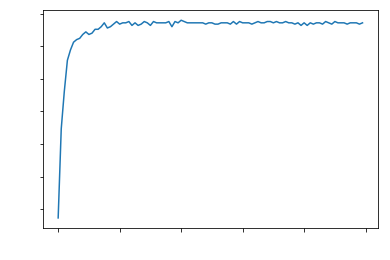

In [25]:
plt.clf()
plt.plot(history.history['val_acc'])
plt.xticks(color='w',fontsize=18)
plt.yticks(color='w',fontsize=18)
plt.show()

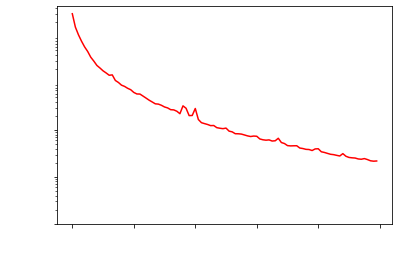

In [26]:
plt.clf()
plt.semilogy(history.history['loss'],'r-')
plt.xticks(color='w',fontsize=18)
plt.yticks([1e-2,1e-3,1e-4],color='w',fontsize=18)
plt.show()

In [27]:
results = model.evaluate(X_test, y_test,verbose=0)

In [28]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9814815


In [29]:
!hostname

cg32-2.agave.rc.asu.edu


Even simple CNN model shows fine performance of **97% **test accuracy

In [30]:
!nvidia-smi

Mon Mar  9 13:23:17 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.33.01    Driver Version: 440.33.01    CUDA Version: 10.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:86:00.0 Off |                    0 |
| N/A   28C    P0    53W / 300W |  15842MiB / 16160MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  